In [23]:
import numpy as np
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import networkx as nx

# Formato para matplotlib
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 120
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'

GIANT_FORMAT = {"with_labels" : False,
                "node_size": 10, "node_color": "red", "edgecolors": "black",
                "linewidths": 0.25, "edge_color": "black"}

In [9]:
### Cargamos los DataFrames
df_science = pd.read_csv("datasets/netscience_edgelist.txt", delimiter=";", header=None, names=["source", "target", "reference"])
df_science["reference"] = df_science["reference"].apply(lambda x: re.sub("'", "\"", x)) #Movemos a formato de JSON estandar
df_science["reference"] = df_science["reference"].apply(json.loads).apply(pd.Series)    #Cargamos a json y desempaquetamos el dict con el Series.

df_apms = pd.read_csv("datasets/yeast_AP-MS.txt", delimiter="\t", header=None, names=["source", "target"])

df_y2h = pd.read_csv("datasets/yeast_Y2H.txt", delimiter="\t", header=None, names=["source", "target"])

df_internet = pd.read_csv("datasets/as-22july06_edgelist.txt", delimiter=" ", header=None, names=["source", "target", "val"])
df_internet.drop("val", axis=1, inplace=True)

dataframes = { 
    "Science": df_science,
    "AP-MS": df_apms,
    "Y2H": df_y2h,
    "Internet": df_internet
}

graph_science = nx.from_pandas_edgelist(df_science,"source","target", create_using=nx.Graph())

graph_apms = nx.from_pandas_edgelist(df_apms,"source","target", create_using=nx.Graph())

graph_y2h = nx.from_pandas_edgelist(df_y2h,"source","target", create_using=nx.Graph())

graph_internet = nx.from_pandas_edgelist(df_internet,"source","target", create_using=nx.Graph())

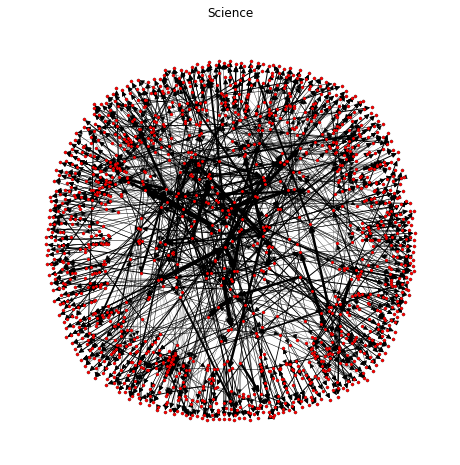

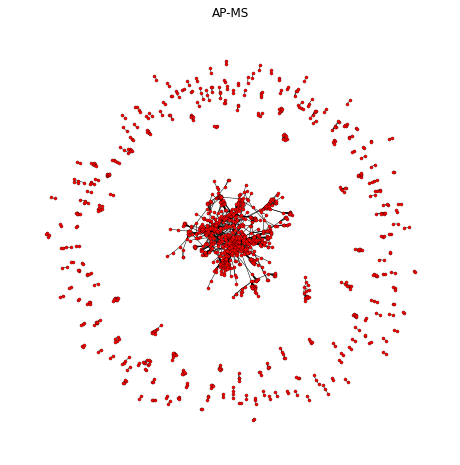

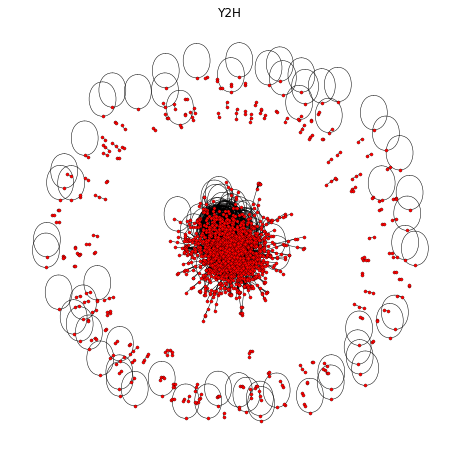

KeyboardInterrupt: 

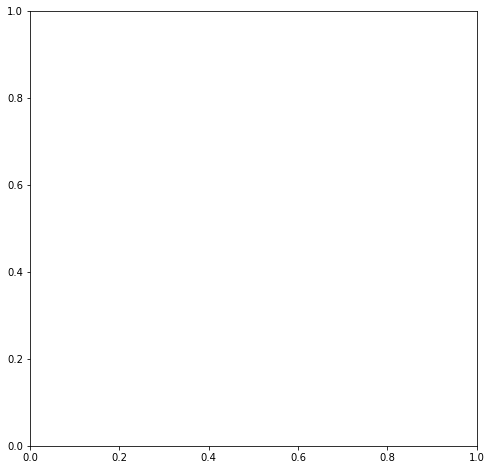

In [7]:
graph_science = nx.from_pandas_edgelist(df_science,"source","target", create_using=nx.Graph())

graph_apms = nx.from_pandas_edgelist(df_apms,"source","target", create_using=nx.Graph())

graph_y2h = nx.from_pandas_edgelist(df_y2h,"source","target", create_using=nx.Graph())

graph_internet = nx.from_pandas_edgelist(df_internet,"source","target", create_using=nx.Graph())

dict_graph = { 
    "Science": graph_science,
    "AP-MS": graph_apms,
    "Y2H": graph_y2h,
    "Internet": graph_internet
}

for name, g in dict_graph.items():
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    if name == 'Science':
        nx.draw(g, width=weight_science, ax=ax,**GIANT_FORMAT)
    else:
        nx.draw(g, width=0.5, ax=ax,**GIANT_FORMAT)
    ax.set_title(name)
    plt.show()

In [25]:
list(dict(nx.degree(graph_y2h)).values())

[1,
 4,
 1,
 20,
 1,
 1,
 8,
 1,
 15,
 1,
 1,
 1,
 2,
 2,
 6,
 3,
 1,
 1,
 4,
 12,
 7,
 4,
 5,
 1,
 6,
 1,
 3,
 1,
 24,
 8,
 8,
 23,
 4,
 11,
 82,
 13,
 2,
 4,
 4,
 21,
 1,
 20,
 4,
 2,
 11,
 1,
 5,
 1,
 2,
 4,
 4,
 3,
 5,
 4,
 3,
 20,
 1,
 7,
 3,
 1,
 2,
 81,
 2,
 29,
 1,
 1,
 18,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 26,
 4,
 2,
 32,
 5,
 4,
 5,
 3,
 6,
 2,
 7,
 4,
 2,
 2,
 1,
 4,
 5,
 9,
 5,
 9,
 6,
 3,
 7,
 10,
 5,
 2,
 5,
 2,
 4,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 7,
 1,
 4,
 1,
 3,
 1,
 8,
 2,
 15,
 29,
 2,
 37,
 52,
 2,
 6,
 3,
 7,
 2,
 6,
 1,
 91,
 9,
 2,
 1,
 1,
 2,
 3,
 4,
 3,
 12,
 4,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 1,
 3,
 1,
 2,
 2,
 4,
 6,
 1,
 3,
 1,
 5,
 2,
 6,
 2,
 3,
 1,
 1,
 2,
 1,
 3,
 4,
 6,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 4,
 5,
 1,
 2,
 6,
 1,
 2,
 1,
 7,
 4,
 18,
 29,
 1,
 29,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 4,
 1,
 2,
 2,
 2,
 17,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 3,
 1,
 7,
 2,
 2,
 3,
 1,
 1,
 10,
 3,
 5,
 4,
 2,
 2,
 10,
 15,
 1,
 5,
 5,
 6,
 3,
 

In [38]:
log_bins

array([ 1.        ,  1.65071184,  2.72484957,  4.49794145,  7.42480519,
       12.25621382, 20.23147725, 33.39633899, 55.12773211, 91.        ])

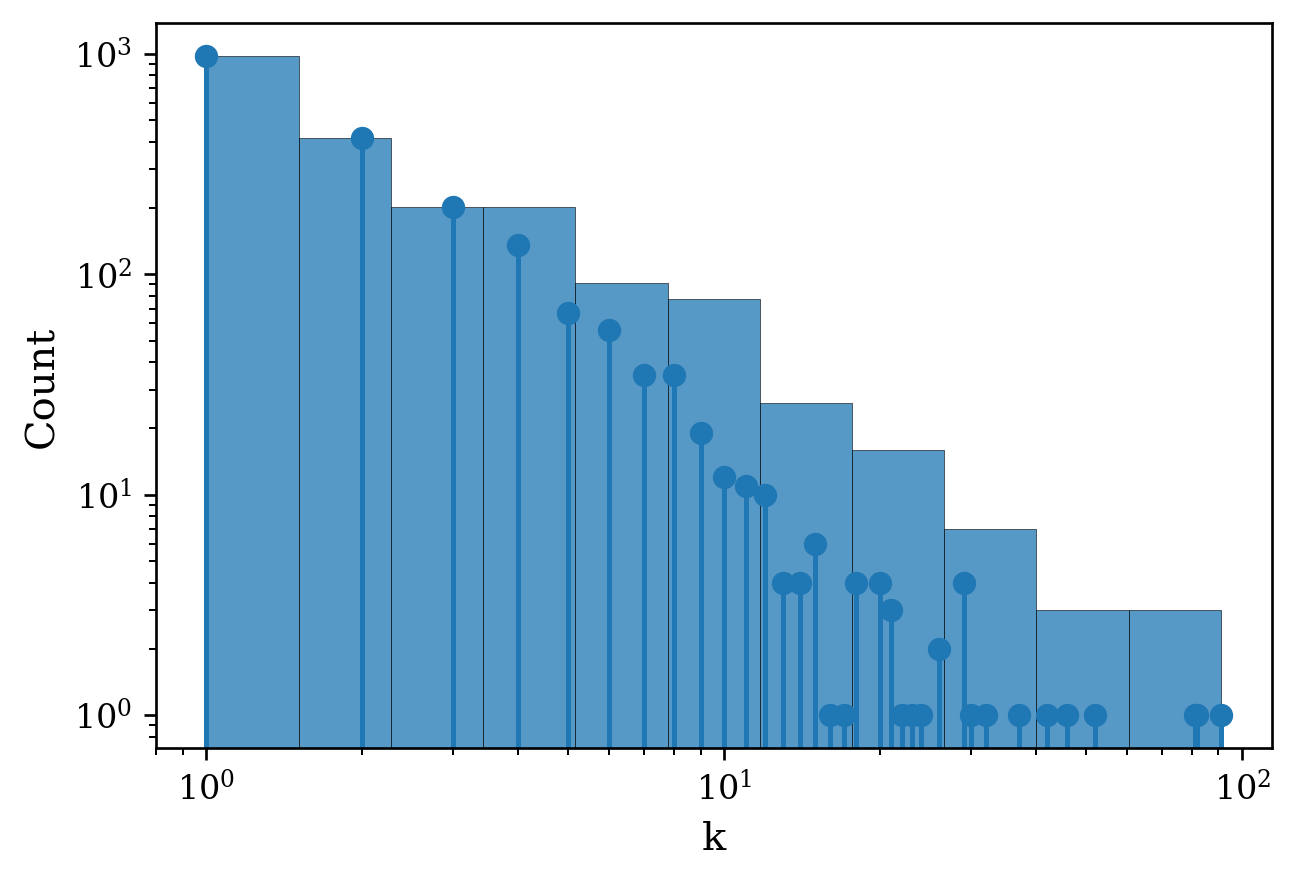

In [50]:
import seaborn as sns
lista_grados_Y2H = list(dict(nx.degree(graph_y2h)).values())
log_bins = np.geomspace(1, np.max(lista_grados_Y2H), 12)
sns.histplot(lista_grados_Y2H, bins=log_bins)
plt.stem(nx.degree_histogram(graph_y2h))
plt.loglog()
plt.xlabel('k')

plt.show()

In [47]:
nx.degree_histogram(graph_y2h)

[0,
 975,
 414,
 203,
 136,
 67,
 56,
 35,
 35,
 19,
 12,
 11,
 10,
 4,
 4,
 6,
 1,
 1,
 4,
 0,
 4,
 3,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 4,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]